In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from matplotlib import pyplot as plt

> **What is Feature Scaling?**


Feature scaling is a preprocessing technique that transforms feature values to a similar scale, ensuring all features contribute equally to the model. It’s essential for datasets with features of varying ranges, units, or magnitudes. Common techniques include standardization, normalization, and min-max scaling. This process improves model performance, convergence, and prevents bias from features with larger values.


> **Why Feature scaling**

Some machine learning algorithms are sensitive to feature scaling, while others are virtually invariant.

Example:
* Gradient Descent Based Algorithms
* Distance Algorithms
* Tree ased Algorithms

> **Gradient Descent Based Algorithms**


Machine learning algorithms like linear regression, logistic regression, neural network, PCA (principal component analysis), etc., that use gradient descent as an optimization technique require data to be scaled. Take a look at the formula for gradient descent below:
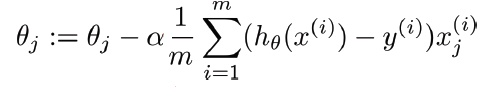


* The presence of feature value X in the formula will affect the step size of the gradient descent. The difference in the ranges of features will cause different step sizes for each feature.
*  To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

> **Distance-Based Algorithms**


Distance algorithms like KNN, K-means clustering, and SVM(support vector machines) are most affected by the range of features. This is because, behind the scenes, they are using distances between data points to determine their similarity.

* For example, let’s say we have data containing high school CGPA scores of students (ranging from 0 to 5) and their future incomes (in thousands Rupees):



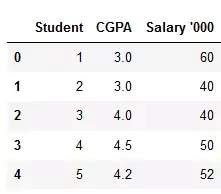


* Since both the features have different scales, there is a chance that higher weightage is given to features with higher magnitudes.
* This will impact the performance of the machine learning algorithm; obviously, we do not want our algorithm to be biased towards one feature.

> **Therefore,** we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.


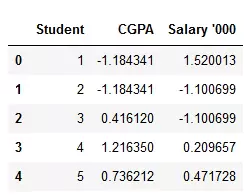

* The effect of scaling is conspicuous when we compare the Euclidean distance between data points for students A and B, and between B and C, before and after scaling, as shown below:
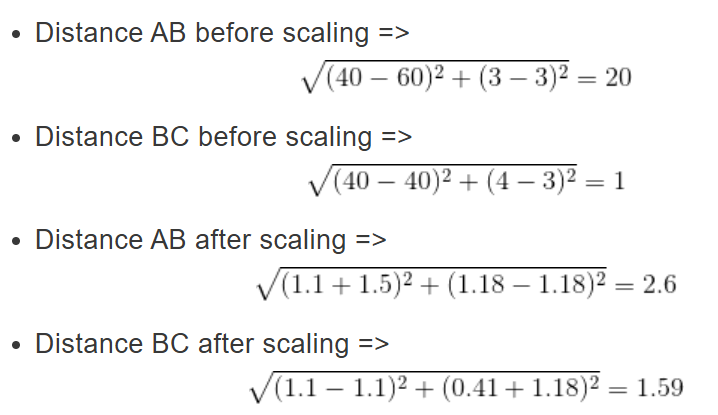



> **Tree-Based Algorithms**

Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree only splits a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. Other features do not influence this split on a feature.

* So, the remaining features have virtually no effect on the split. This is what makes them invariant to the scale of the features!

> **Types of Feature Scaling**

* Two primary methods are normalization and standardization.



  * **1.Normalization:**
  
   This method scales each feature so that all values are within the range of 0 and 1. It achieves this by subtracting the minimum value of the feature and dividing by the range (difference between maximum and minimum values).
  *  Normalization is a fundamental technique in machine learning that transforms numerical features to a standard scale, typically between 0 and 1.

  *  Feature scaling helps the gradient descent converge more quickly towards the minima.
  

  * formula : (x — min(X)) / (max(X) — min(X))
  * its also called as min max ascaler
  * **This technique is suitable when the distribution of the data does not follow a Gaussian distribution.**

* **2. Standardization:**

   Standardization is another Feature scaling method where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation.

 * Here, each feature is transformed to have a mean of 0 and a standard deviation of 1. This is achieved by subtracting the mean value and dividing by the standard deviation of the feature.

* This technique rescales a feature value so that it has a distribution with 0 mean value and variance equal to 1.

* Formula:

     Z = (x — μ) / σ

​
Here, σ is the standard deviation of the feature vector, μ and  is the average(mean) of the feature vector.




* **3. Log Scaling**


Log scaling calculates the log of the feature's values to reduce a wide range to a small range. Formula:

x
′
=
log
⁡
(
x
)

Where x is the concerned feature.

> **The Big Question – Normalize or Standardize?**

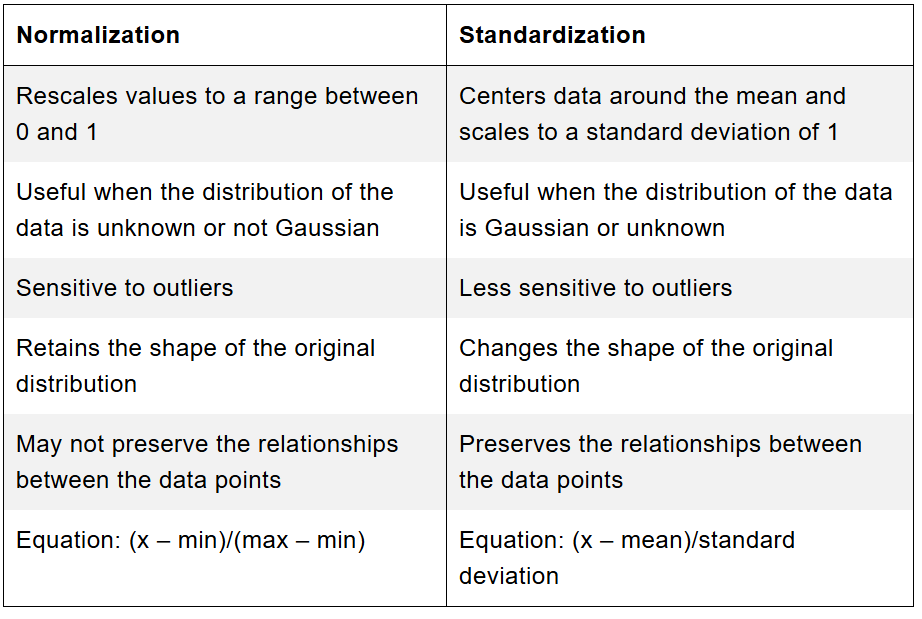

> **Normalization or Standardization**

There is no correct answer as to whether normalization or standardization should be preferred.

Here are the conditions
* when normalization is preferred:-

 * When the distribution of data does not follow a Gaussian distribution.
 * While doing image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range) or any similar use cases which require a specific range.

* When to use standardization:-

  * When the distribution of data follows a Gaussian distribution.
  * While performing clustering or principal component analysis(PCA).

* However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data

* **You can always start by fitting your model to raw, normalized, and standardized data and comparing the performance for the best results.**

> **Note :**

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

In [ ]:
data = sns.load_dataset('titanic')
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


### **Normalization**

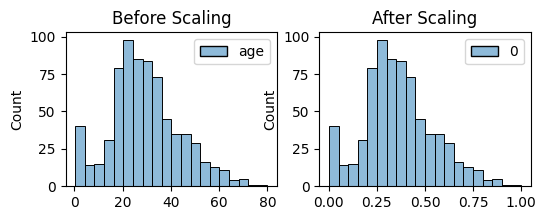

In [ ]:
# normalization
from sklearn.preprocessing import MinMaxScaler

age = data[['age']]

scale = MinMaxScaler()
Scaled_Age = scale.fit_transform(age)

# axes
fig, ax = plt.subplots(1,2,figsize=(6,2))
sns.histplot(age,ax=ax[0])
ax[0].set_title('Before Scaling')

sns.histplot(Scaled_Age,ax=ax[1])
ax[1].set_title("After Scaling")
plt.show()


### **Standerdization**

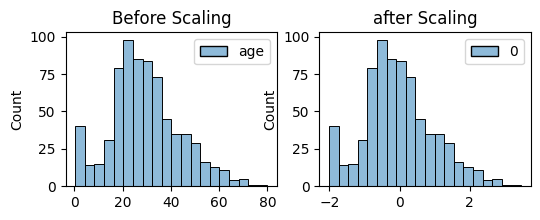

In [ ]:
# stander Scaler
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_age = scale.fit_transform(age)

# plots
fig,axes = plt.subplots(1,2,figsize=(6,2))
sns.histplot(age,ax=axes[0])
axes[0].set_title("Before Scaling")

sns.histplot(scaled_age,ax=axes[1])
axes[1].set_title("after Scaling")
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


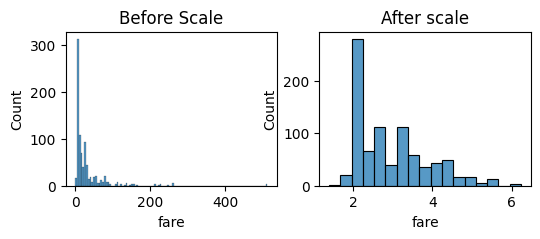

In [ ]:
fare = data['fare']
logged_fare = np.log(fare)

#plots
fig,axes = plt.subplots(1,2,figsize=(6,2))
sns.histplot(fare,ax=axes[0])
axes[0].set_title("Before Scale")
sns.histplot(logged_fare,ax=axes[1])
axes[1].set_title("After scale")
plt.show()
